In [11]:
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA

from lib.dlib_facenet import DlibFacenetFeatures
import lib.utils as utils

In [2]:
train_imgs, train_labels = utils.load_train_images_cv_grayscale(grayscale=False)
print(len(train_imgs))

3500


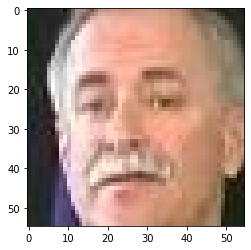

In [3]:
plt.imshow(train_imgs[0])

In [4]:
dlib_facenet_feature_manager = DlibFacenetFeatures()

In [5]:
emb = dlib_facenet_feature_manager.get_embedding(train_imgs[0])
print(emb.shape)
emb

(128,)


array([-0.06194645,  0.12638901,  0.066762  , -0.04737063, -0.07397254,
       -0.05800291, -0.02900824, -0.1555315 ,  0.14161661, -0.0375584 ,
        0.11281129, -0.07801206, -0.2490361 ,  0.05047627, -0.08033887,
        0.11368174, -0.24758843, -0.13534684, -0.13769391, -0.11724766,
       -0.02513168,  0.0543387 ,  0.03214255, -0.02775393, -0.08317706,
       -0.29453561, -0.07588237, -0.10801688,  0.14352195, -0.02796929,
        0.04149824,  0.00330952, -0.18236755, -0.04032004,  0.00526055,
       -0.05258128, -0.10439069, -0.06300727,  0.23542927,  0.07662722,
       -0.19261457,  0.03539223,  0.0235256 ,  0.25121549,  0.20002981,
        0.0765459 , -0.00062323, -0.08809107,  0.08440623, -0.28682008,
        0.09588269,  0.20542105,  0.13286029,  0.05459869,  0.1071055 ,
       -0.15127757,  0.01152243,  0.11235549, -0.14064793,  0.17068338,
        0.18718982, -0.07905888, -0.00245928, -0.01996538,  0.15818824,
        0.11186803, -0.05873691, -0.07709347,  0.2229794 , -0.13

In [6]:
train_embs = dlib_facenet_feature_manager.get_embeddings(train_imgs)
train_embs.shape

100%|██████████| 3500/3500 [11:06<00:00,  5.25it/s]


(3500, 128)

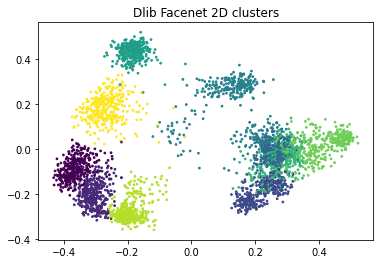

In [7]:
pca_2 = PCA(n_components=2)
pca_2.fit(train_embs)
train_features_2d = pca_2.transform(train_embs)

plt.scatter(train_features_2d[:, 0], train_features_2d[:, 1], s=3, c=train_labels, cmap="viridis")
plt.title("Dlib Facenet 2D clusters")
plt.show()

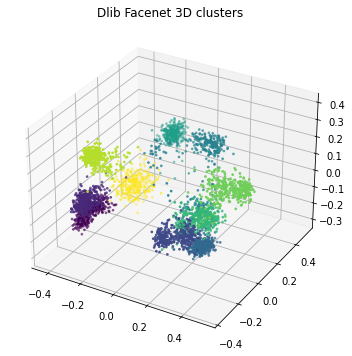

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

pca_3 = PCA(n_components=3)
pca_3.fit(train_embs)
train_features_3d = pca_3.transform(train_embs)

ax.scatter(train_features_3d[:, 0], train_features_3d[:, 1], train_features_3d[:, 2], s=3, c=train_labels, cmap="viridis")
plt.title("Dlib Facenet 3D clusters")
plt.show()

In [10]:
test_imgs, test_labels = utils.load_test_images_cv_grayscale(grayscale=False)
test_embs = dlib_facenet_feature_manager.get_embeddings(test_imgs)
test_embs.shape

100%|██████████| 1500/1500 [04:46<00:00,  5.24it/s]


(1500, 128)

In [12]:
with open("./.emb_cache/dlib/train_embs.bin", "wb") as f:
    pickle.dump(train_embs, f)
with open("./.emb_cache/dlib/train_embs.bin", "rb") as f:
    saved_train_embs = pickle.load(f)
    print((train_embs == saved_train_embs).mean())

1.0


In [13]:
with open("./.emb_cache/dlib/test_embs.bin", "wb") as f:
    pickle.dump(test_embs, f)
with open("./.emb_cache/dlib/test_embs.bin", "rb") as f:
    saved_test_embs = pickle.load(f)
    print((test_embs == saved_test_embs).mean())

1.0
